In [ ]:
%pip install pandas
%pip install pandas_datareader
%pip install datetime
%pip install matplotlib
%pip install seaborn
%pip install pyarrow
%pip install fastparquet
%pip install yfinance
%pip install html5lib

In [42]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from matplotlib import style

plt.style.use('fivethirtyeight')


In [149]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 27)

sp500 = web.DataReader(['sp500'], 'fred', start, end)

In [124]:
sp500['daily_return'] = (SP500['sp500']/ SP500['sp500'].shift(1)) -1

#Drop all Not a number values using drop method.
sp500.dropna(inplace = True)

splast = sp500.tail(5)
print(splast)

              sp500  daily_return
DATE                             
2021-01-21  3853.07      0.000317
2021-01-22  3841.47     -0.003011
2021-01-25  3855.36      0.003616
2021-01-26  3849.62     -0.001489
2021-01-27  3750.77     -0.025678


<AxesSubplot: title={'center': 'S&P 500 daily returns'}, xlabel='DATE'>

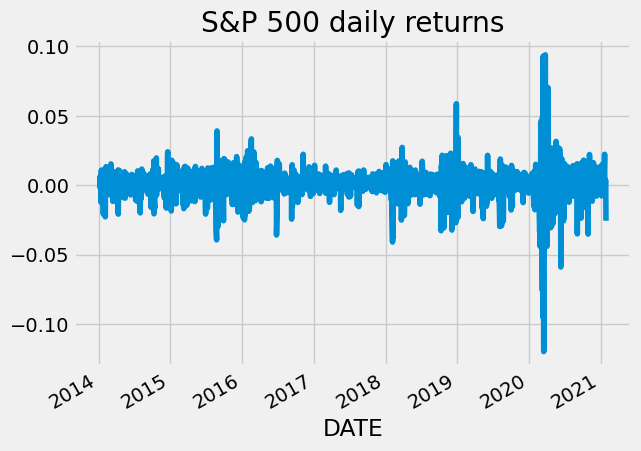

In [125]:
sp500['daily_return'].plot(title='S&P 500 daily returns')

<AxesSubplot: title={'center': 'S&P 500 Price'}, xlabel='DATE'>

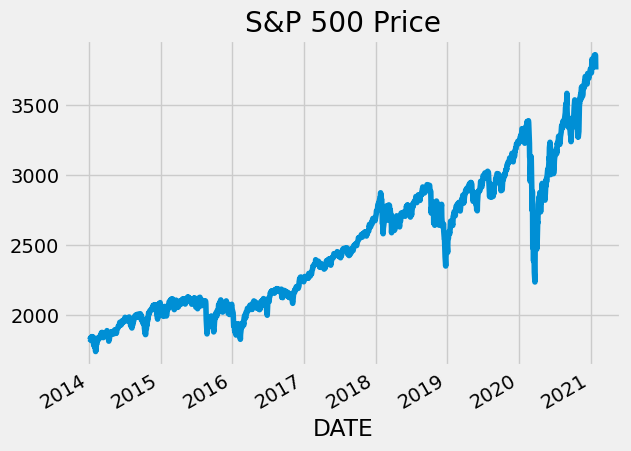

In [126]:
SP500['sp500'].plot(title='S&P 500 Price')

In [165]:

start = dt.datetime(2014, 1, 1)        
end = dt.datetime(2021, 10, 10)

tickers_list = ['AAPL', 'IBM',  'BA', 'AXP']

# Fetch the data
data = yf.download(tickers_list, start, end)['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%***********************]  4 of 4 completed
                 AAPL        AXP          BA         IBM
Date                                                    
2014-01-02  17.415529  78.466034  116.807961  122.360893
2014-01-03  17.032988  78.720428  117.619888  123.092941
2014-01-06  17.125866  78.685333  118.295082  122.670837
2014-01-07  17.003389  78.387085  120.089897  125.117683
2014-01-08  17.111071  78.633347  120.354836  123.970085


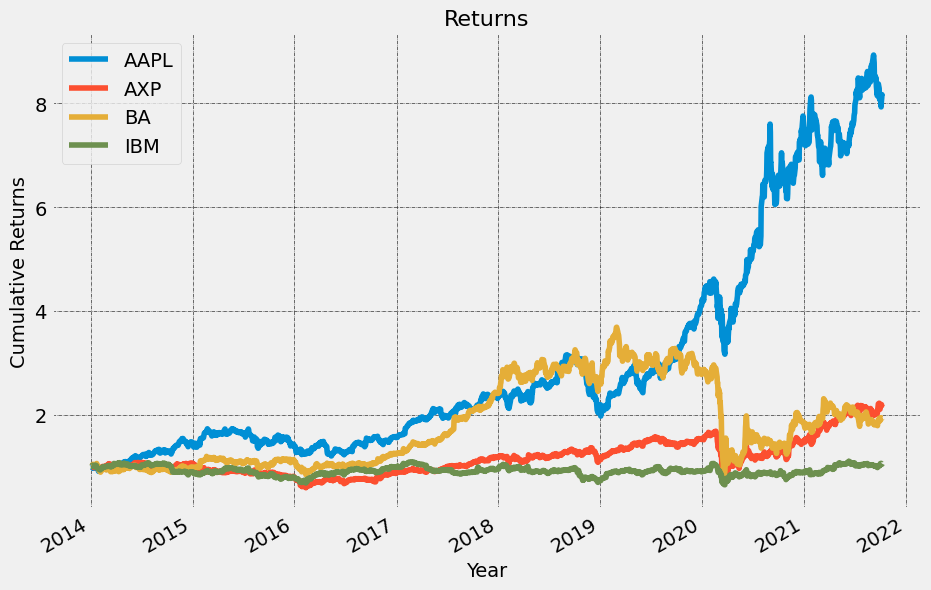

In [166]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.4)
plt.show()

In [142]:

gdp = wb.download(indicator='NY.GDP.MKTP.CD', country='US', start=2014, end=2021)
print(gdp)

                    NY.GDP.MKTP.CD
country       year                
United States 2021  22996100000000
              2020  20893743833000
              2019  21372572437000
              2018  20527156026000
              2017  19479620056000
              2016  18695110842000
              2015  18206020741000
              2014  17550680174000


In [157]:
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2021, 10, 10)

tickers_list = ['^GSPC']

# Fetch the data
data = yf.download(tickers_list, start, end)['Adj Close']

# Print first 5 rows of the data
print(data)

[*********************100%***********************]  1 of 1 completed
Date
2014-01-02    1831.979980
2014-01-03    1831.369995
2014-01-06    1826.770020
2014-01-07    1837.880005
2014-01-08    1837.489990
                 ...     
2021-10-04    4300.459961
2021-10-05    4345.720215
2021-10-06    4363.549805
2021-10-07    4399.759766
2021-10-08    4391.339844
Name: Adj Close, Length: 1957, dtype: float64


[*********************100%***********************]  1 of 1 completed
Date
2014-01-02    1831.979980
2014-01-03    1831.369995
2014-01-06    1826.770020
2014-01-07    1837.880005
2014-01-08    1837.489990
                 ...     
2021-10-04    4300.459961
2021-10-05    4345.720215
2021-10-06    4363.549805
2021-10-07    4399.759766
2021-10-08    4391.339844
Name: Adj Close, Length: 1957, dtype: float64


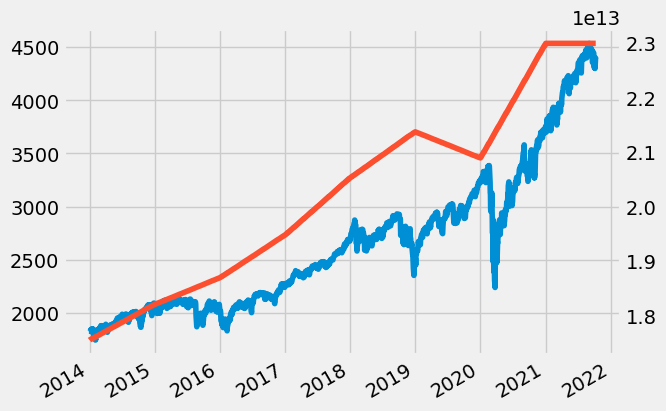

In [160]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import wb

gdp = wb.download(indicator='NY.GDP.MKTP.CD', country='US', start=2014, end=2021)
gdp = gdp.unstack().T.reset_index(0)
gdp.index = pd.to_datetime(gdp.index, format='%Y')

start = dt.datetime(2014, 1, 1)
end = dt.datetime(2021, 10, 10)

tickers_list = ['^GSPC']

# Fetch
datasp = yf.download(tickers_list, start, end)['Adj Close']

# we print first 5 rows of the data
print(datasp)

data = datasp.to_frame().join(gdp, how='outer')
data = data.interpolate(method='linear')
ax = data['Adj Close'].plot()
ax = data['United States'].plot(ax=ax, secondary_y=True)
plt.show()